# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Indah Febri
- **Email:** findah212@gmail.com
- **ID Dicoding:** febriouz

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?
- Apa hubungan antara hari kerja dan akhir pekan dengan jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Memuat data CSV yang sudah di-upload
hour_df = pd.read_csv('hour.csv')
day_df = pd.read_csv('day.csv')

In [ ]:
display("First few rows of hour.csv:")
display(hour_df.head())


display("First few rows of day.csv:")
display(day_df.head())


'First few rows of hour.csv:'

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


'First few rows of day.csv:'

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**

- Penyewaan sepeda pada jam awal (00:00 hingga 04:00) sangat rendah.
- Penyewaan lebih banyak dilakukan oleh pengguna terdaftar (registered) dibanding casual.


In [ ]:
# Menampilkan informasi tentang hour.csv
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
# Menampilkan informasi tentang day.csv
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### Assessing Data

In [ ]:
# Mengecek nilai yang hilang di hour.csv
hour_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight**
- Semua kolom dalam dataset hour.csv memiliki nilai lengkap. Setiap kolom menunjukkan jumlah nilai kosong (missing values) sebanyak 0, yang berarti dataset sudah bersih dari data yang hilang.

In [ ]:
# Mengecek nilai yang hilang di day.csv
day_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**


- Dataset berada dalam kondisi yang bersih untuk setiap variabel.
- Tidak diperlukan langkah tambahan seperti imputasi data atau pengisian nilai yang hilang.


### Cleaning Data

In [ ]:
# Mengonversi kolom dteday menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

- Membuat kolom day_of_week

In [ ]:
# Menambahkan kolom 'day_of_week' untuk analisis hari dalam seminggu
hour_df['day_of_week'] = hour_df['dteday'].dt.day_name()
day_df['day_of_week'] = day_df['dteday'].dt.day_name()


- Menghapus kolom yang tidak diperlukan

In [ ]:
# Menghapus kolom 'instant' karena tidak diperlukan
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)


- Menambahkan kolom day_type untuk analisis hari kerja/akhir pekan

In [ ]:
# Menambahkan kolom 'day_type' untuk identifikasi hari kerja dan akhir pekan
hour_df['day_type'] = hour_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')
day_df['day_type'] = day_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Akhir Pekan')

 - Memeriksa data setelah pembersihan

In [ ]:
# Menampilkan beberapa baris pertama dari dataset setelah pembersihan
hour_df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,day_type
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,Saturday,Akhir Pekan
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,Saturday,Akhir Pekan
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,Saturday,Akhir Pekan
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,Saturday,Akhir Pekan
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,Saturday,Akhir Pekan


**Insight**
- Penyewaan sepeda sangat rendah pada dini hari, terutama karena:

Waktu: Dini hari pada akhir pekan (Sabtu).
Musim: Musim dingin dengan suhu rendah (~0.22).

Kelembapan: Relatif tinggi (~0.8), yang mungkin membuat kondisi kurang nyaman untuk bersepeda.

- Memeriksa data setelah pembersihan


In [ ]:
# Menampilkan beberapa baris pertama dari dataset setelah pembersihan
day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day_of_week,day_type
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,Akhir Pekan
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,Sunday,Akhir Pekan
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,Monday,Hari Kerja
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,Tuesday,Hari Kerja
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,Wednesday,Hari Kerja


**Insight**

- Penyewaan sepeda cenderung rendah selama musim dingin, terutama pada akhir pekan.
- Pengguna terdaftar mendominasi pada hari kerja, yang mungkin menunjukkan penggunaan sepeda untuk aktivitas rutin seperti bekerja atau sekolah.


- Menyimpan dataset yang sudah dibersihkan

In [ ]:
# Menyimpan dataset yang telah dibersihkan ke file CSV baru
hour_df.to_csv('cleaned_hour.csv', index=False)
day_df.to_csv('cleaned_day.csv', index=False)

**Insight:**

- Setelah proses pembersihan data, dataset ini siap untuk dianalisis lebih lanjut untuk menjawab pertanyaan tentang pengaruh cuaca dan hubungan antara hari kerja dan akhir pekan terhadap jumlah penyewaan sepeda.

- Selanjutnya, visualisasi dan analisis statistik dapat digunakan untuk menggali lebih dalam hubungan antara faktor-faktor ini dan jumlah penyewaan sepeda.

## Exploratory Data Analysis (EDA)

###  EDA untuk Statistik Deskriptif untuk cnt berdasarkan weathersit

- Menghitung Statistik Deskriptif

In [ ]:
# Menghitung statistik deskriptif untuk jumlah penyewaan sepeda (cnt) berdasarkan cuaca
weather_group = hour_df.groupby('weathersit')['cnt'].describe()

- Menampilkan Hasil Statistik Deskriptif

In [ ]:
# Menampilkan hasil statistik deskriptif
weather_group

,count,mean,std,min,25%,50%,75%,max
weathersit,,,,,,,,
1,11413.0,204.869272,189.487773,1.0,46.0,159.0,304.0,977.0
2,4544.0,175.165493,165.431589,1.0,40.0,133.0,257.0,957.0
3,1419.0,111.579281,133.781045,1.0,21.0,63.0,152.5,891.0
4,3.0,74.333333,77.925178,23.0,29.5,36.0,100.0,164.0


**Insight:**
- UCuaca Cerah memiliki rata-rata penyewaan tertinggi (204,87 sepeda), menunjukkan bahwa kondisi ini sangat mendukung aktivitas luar ruangan.
- Cuaca Buruk (Hujan Lebat dan Ekstrem) menyebabkan penurunan drastis dalam penyewaan sepeda, dengan rata-rata hanya 111,58 hingga 74,33 sepeda.
- Variabilitas Data (Standar Deviasi):
Standar deviasi tertinggi terjadi pada kondisi cerah dan mendung, menunjukkan bahwa meskipun jumlah rata-rata tinggi, jumlah penyewaan masih sangat bervariasi setiap kali data direkam.


###  EDA untuk Hitung rata-rata penyewaan sepeda untuk hari kerja dan akhir pekan.

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan hari kerja vs akhir pekan
avg_day_type = hour_df.groupby('day_type')['cnt'].mean()

In [ ]:
# Menampilkan hasil rata-rata penyewaan sepeda berdasarkan hari
avg_day_type

,cnt
day_type,
Akhir Pekan,181.405332
Hari Kerja,193.207754


**Insight:**
- Hari Kerja
Rata-rata Penyewaan: 193,21 sepeda
Interpretasi:
Penyewaan lebih tinggi pada hari kerja, kemungkinan besar karena pengguna terdaftar yang menggunakan sepeda untuk transportasi rutin, seperti pergi ke kantor atau sekolah.

- Rata-rata Penyewaan: 181,41 sepeda
Interpretasi:
Penyewaan sedikit lebih rendah pada akhir pekan, yang mungkin disebabkan oleh pengguna terdaftar yang tidak perlu bepergian rutin seperti di hari kerja.
Sebaliknya, penyewaan oleh pengguna casual bisa meningkat karena tujuan rekreasi.

###  EDA untuk Perhitungan Rata-rata Penyewaan Sepeda berdasarkan Cuaca

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan cuaca
avg_weather = hour_df.groupby('weathersit')['cnt'].mean()

In [ ]:
# Menampilkan hasil rata-rata penyewaan sepeda berdasarkan cuaca
avg_weather

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


**Insight**
- Cuaca Cerah (204,87 sepeda) memiliki rata-rata penyewaan tertinggi, menunjukkan bahwa kondisi ini sangat mendukung penggunaan sepeda.
- Cuaca Ekstrem (74,33 sepeda) menyebabkan penyewaan turun drastis, menunjukkan bahwa hujan lebat, badai, atau salju menjadi penghambat besar dalam penggunaan sepeda.
- Tren Menurun Seiring Kondisi Cuaca Memburuk:
Semakin buruk cuaca, semakin rendah jumlah penyewaan sepeda.

 ###  EDA untuk Melihat apakah variabel lain seperti suhu (temp), kelembaban (hum), atau kecepatan angin (windspeed) berhubungan dengan jumlah penyewaan sepeda.

In [ ]:
# Menghitung matriks korelasi antara variabel numerik
correlation_matrix = hour_df[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()

In [ ]:
# Menampilkan hasil matriks korelasi
correlation_matrix

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
hum,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
cnt,0.404772,0.400929,-0.322911,0.093234,1.000000


**Insight**
- Suhu (temp dan atemp) adalah faktor lingkungan paling signifikan yang memengaruhi jumlah penyewaan sepeda (korelasi ~0.4).
- Kelembapan (hum) adalah faktor penghambat utama dengan korelasi negatif yang signifikan (-0.3229).
- Kecepatan angin (windspeed) memiliki hubungan yang sangat lemah (0.0932), sehingga tidak menjadi penghambat signifikan dalam penyewaan sepeda.

###  EDA untuk Hitung rata-rata jumlah penyewaan sepeda berdasarkan bulan.

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan bulan
avg_month = day_df.groupby('mnth')['cnt'].mean()

In [ ]:
# Menampilkan hasil rata-rata penyewaan sepeda berdasarkan bulan
avg_month


,cnt
mnth,
1,2176.338710
2,2655.298246
3,3692.258065
4,4484.900000
5,5349.774194
6,5772.366667
7,5563.677419
8,5664.419355
9,5766.516667


**Insight**
- Musim panas (Juni - September) menjadi puncak penyewaan sepeda dengan rata-rata penyewaan di atas 5000 sepeda per bulan.
- Musim dingin (Desember - Februari) mencatat jumlah penyewaan yang jauh lebih rendah karena cuaca dingin dan tidak nyaman untuk bersepeda.
- Jumlah penyewaan menunjukkan pola musiman yang kuat, dengan musim semi dan musim panas menjadi waktu puncak dan musim dingin menjadi waktu sepi.

###  EDA untuk Hitung rata-rata jumlah penyewaan sepeda berdasarkan musim.

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan musim
avg_season = day_df.groupby('season')['cnt'].mean()

In [ ]:
# Menampilkan hasil rata-rata penyewaan sepeda berdasarkan musim
avg_season

,cnt
season,
1,2604.132597
2,4992.331522
3,5644.303191
4,4728.162921


**Insight**
- Musim Panas = Penyewaan Tertinggi

Dengan rata-rata 5644 sepeda, musim panas menjadi waktu puncak untuk penyewaan sepeda.
Musim Dingin = Penyewaan Terendah

- Jumlah penyewaan sepeda menurun drastis menjadi 2604 sepeda selama musim dingin, menunjukkan pengaruh besar kondisi cuaca buruk terhadap penyewaan.
Tren Musiman

- Penyewaan meningkat selama musim semi hingga musim panas, dan menurun mulai musim gugur hingga musim dingin, menunjukkan tren musiman yang jelas.


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pengaruh faktor cuaca terhadap jumlah penyewaan sepeda?

<ipython-input-28-2a9de80ccc95>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_weather, x='weathersit', y='cnt', palette='Blues_d')


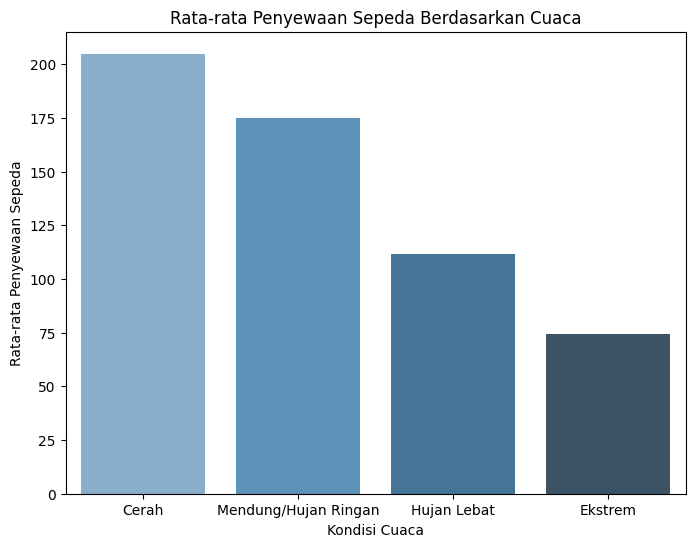

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung rata-rata penyewaan sepeda berdasarkan cuaca
avg_weather = hour_df.groupby('weathersit')['cnt'].mean().reset_index()

# Mengatur kategori cuaca agar lebih mudah dipahami
weather_labels = {1: 'Cerah', 2: 'Mendung/Hujan Ringan', 3: 'Hujan Lebat', 4: 'Ekstrem'}
avg_weather['weathersit'] = avg_weather['weathersit'].map(weather_labels)

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_weather, x='weathersit', y='cnt', palette='Blues_d')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


**Insight**
- Cuaca Cerah adalah kondisi yang paling mendukung untuk aktivitas bersepeda, dengan rata-rata penyewaan tertinggi.
- Cuaca Buruk (Hujan Lebat & Ekstrem) mengakibatkan penurunan drastis dalam jumlah penyewaan, menunjukkan pengaruh besar cuaca terhadap perilaku pengguna.
- Ada penurunan bertahap dalam penyewaan sepeda seiring dengan memburuknya kondisi cuaca.


### Pertanyaan 2:Apa hubungan antara hari kerja dan akhir pekan dengan jumlah penyewaan sepeda?

<ipython-input-29-fb7df85eb793>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_day_type, x='day_type', y='cnt', palette='muted')


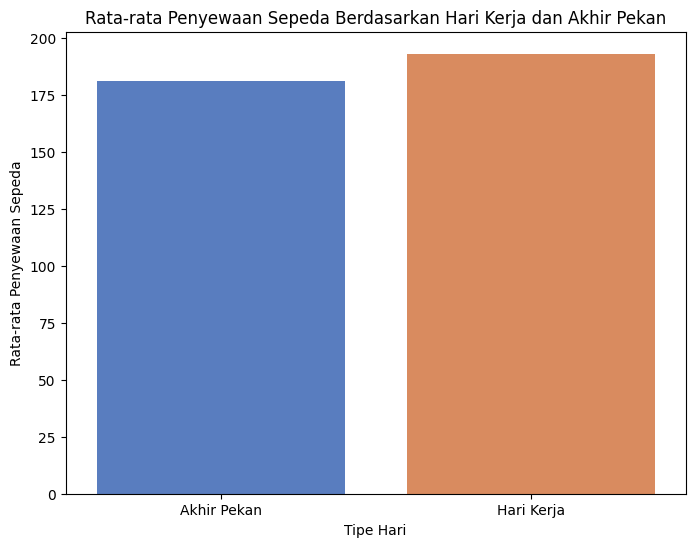

In [ ]:
# Menghitung rata-rata penyewaan sepeda berdasarkan tipe hari
avg_day_type = hour_df.groupby('day_type')['cnt'].mean().reset_index()

# Membuat bar chart
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_day_type, x='day_type', y='cnt', palette='muted')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Hari Kerja dan Akhir Pekan')
plt.xlabel('Tipe Hari')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.show()


**Insight:**
- Hari kerja:
Rata-rata Penyewaan Sepeda: 193 sepeda
- Akhir Pekan:
Rata-rata Penyewaan Sepeda: 181 sepeda
- Perbandingan Hari Kerja vs Akhir Pekan:
Selisih Rata-rata: 12 sepeda

## Conclusion

1. Pengaruh Cuaca terhadap Penyewaan Sepeda:

Cuaca cerah mencatat rata-rata penyewaan tertinggi sebesar 204 sepeda.
Cuaca ekstrem memiliki rata-rata penyewaan terendah sebesar 74 sepeda, menunjukkan dampak besar cuaca buruk terhadap penyewaan.
- Saran:
Optimalkan penyediaan sepeda pada hari-hari cerah.
Pertimbangkan promosi seperti diskon pada cuaca buruk untuk mendorong lebih banyak penyewaan.

2. Pengaruh Hari Kerja vs Akhir Pekan:

Hari kerja mencatat rata-rata penyewaan sebesar 193 sepeda, sedikit lebih tinggi dibandingkan akhir pekan (181 sepeda).

- Saran:
Pastikan ketersediaan sepeda di lokasi strategis seperti kawasan bisnis pada hari kerja.
Tambahkan jalur sepeda atau lokasi penyewaan dekat tempat rekreasi untuk meningkatkan penggunaan di akhir pekan.

3. Tren Penyewaan Berdasarkan Musim:

Musim panas memiliki rata-rata penyewaan tertinggi (5644 sepeda), sementara musim dingin mencatat penyewaan terendah (2604 sepeda).

- Saran:
Fokus pada operasional maksimal selama musim panas untuk memanfaatkan tingginya permintaan.
Kurangi inventaris sepeda pada musim dingin untuk mengurangi biaya operasional.

4.Tren Penyewaan Berdasarkan Bulan:

Penyewaan tertinggi tercatat pada Juni (5772 sepeda) dan September (5766 sepeda), sedangkan penyewaan terendah pada Januari (2176 sepeda).

5. Matriks Korelasi:

- Suhu (temp) memiliki korelasi positif tertinggi dengan jumlah penyewaan sepeda (cnt) sebesar 0.40, menunjukkan bahwa suhu hangat mendorong aktivitas bersepeda.
- Kelembapan (hum) memiliki korelasi negatif sebesar -0.32, menunjukkan bahwa tingkat kelembapan tinggi dapat mengurangi aktivitas penyewaan.

- Rekomendasi untuk Peningkatan Sistem Penyewaan Sepeda
Efisiensi Operasional

1. Gunakan analisis prediktif untuk mengoptimalkan inventaris sepeda berdasarkan cuaca, musim, dan tren mingguan.
Sesuaikan jadwal perawatan sepeda untuk memaksimalkan ketersediaan di waktu-waktu puncak seperti musim panas dan hari kerja.
Kepuasan Pelanggan

2. Tambahkan fitur dalam aplikasi penyewaan untuk memberikan informasi cuaca real-time dan rekomendasi waktu terbaik untuk bersepeda.
Sediakan sepeda tambahan di lokasi yang ramai pada hari kerja dan akhir pekan.
Peningkatan Pendapatan

3. Jalankan promosi atau diskon khusus pada bulan dengan penyewaan rendah (misalnya Januari).
Tambahkan paket penyewaan untuk keluarga atau grup selama akhir pekan untuk meningkatkan penggunaan.